 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 04 : Neural Networks </b>


This programming assignment gives you a chance to perform the classification task using neural networks. You will get to build a neural network from scratch and train and test it on a standard classification dataset. Further you will learn different tricks and techniques to train a neural network eficiently by observing few important issues and trying to overcome them. This includes observing the performance of the network for different activation functions and optimization algorithms. We will conclude with implementation of various regularization techniques to overcome the problems of overfitting and vanishing gradients.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








<b>  Part - (1) : Develop a neural network based classification network from scratch: </b>  This programming assignment uses MNIST digit dataset. It consists of large collection of handwritten digits from 0 to 9. These images are formated as 28x28 pixel gray scale images. The objective of this programming assignment is to design a neural network architecture that takes input as 28x28 image (or 784 dimensional vector) as input and predicts the digit information in it. Although there are diffrent varieties of neural network architecture to solve this task, this programming assignment uses only the feed forward network.  

<dt> <h6> 1. Load MNIST data and create train, test splits </dt> </h6>

<dd> <h6> - The MNIST dataset consists of around 70,000 images. Divide the dataset into two segments: training and testing. Allocate 60,000 images for training and 10,000 images for testing
</dd> </h6>
<dd> <h6> - Code for downloading the data and creating train-test splits is provided </dd> </h6>

<dt> <h6> 2. Design a simple classification network </dt> </h6>

<dd> <h6> - Let us use three layer feed-forward neral network. Use 512 nodes in the hidden layers and 10 nodes in the output layer. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dd> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dd> </h6>
<dd> <h6> where $\textbf{W}_{1} \in \mathcal{R}^{512 \times 768}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{10 \times 512} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dd> </h6>
<dd> <h6> - Consider g(.) as ReLU activation function. Softmax activation function should be used at the last layer h(.), to get the posterior probability of the classes. </dd> </h6>

<dt> <h6> - Training classification network: </dt> </h6>

<dd> <h6>  - Flatten the 28x28 images to arrive at 784 dimensional vector.  </dd> </h6>  
<dd> <h6> - Randomly initialize the parameters of network, $\textbf{W}_{1} \in \mathcal{R}^{768 \times 512}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{512 \times 10}$  </dd> </h6>
<dd> <h6> - Feedforward the batch of input vectors to get the posterior probability of classes.  </dd> </h6>
<dd> <h6> - Compute the loss between the estimated posterior probabilities and the true targets. </dd> </h6>  
<dd> <h6> - Update the parameters of network to minimize the loss function.  </dd> </h6>
<dd> <h6> <dd> <h6> - Backpropagate the loss function to get the gradients.  </dd> </h6> </dd> </h6>  

<dd> <h6> <dd> <h6> - You can use stochastic gradient descent (SGD) optimization algorithm to update the parameters.  </dd> </h6> </dd> </h6>  
<dd> <h6> <dd> <h6> - Cleverly set the hyperparameters involved in this optimization process. </dd> </h6> </dd> </h6>

<dt> <h6> 3. Evaluate the performance of classification network </dd> </h6>
<dd> <h6> - feed-forward the MNIST data through the trained classification network to get class posteriors. </dd> </h6>  
<dd> <h6> - Assign the input to the class having maximum posterior probability </dd> </h6>  
<dd> <h6> - Compute the loss and accuaracy </dd> </h6>  
<dd> <h6> - Report your observations </dd> </h6>  





In [2]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

In [27]:
##################################################
#Load MNIST data.
##################################################
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

#Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()
print("Training data",mnist_traindata.shape)
print("Training labels",mnist_trainlabel.shape)

#Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()
print("Testing data",mnist_testdata.shape)
print("Testing labels",mnist_testlabel.shape)

X_train = mnist_traindata.reshape((60000,784))
X_train = (X_train - X_train.min())/(X_train.max() - X_train.min())
Y_train = mnist_trainlabel
X_test = mnist_testdata.reshape((10000,784))
Y_test = mnist_testlabel
X_test = (X_test)/255.0

##################################################
#Define the architecture
##################################################

#Complete the below function to impliment ReLU activation function
def ReLu(inp):      
  outp = np.maximum(inp,0)
  return outp

#Complete the below function to impliment gradient of ReLU activation function
def gradReLu(inp):     
  outp = np.zeros(inp.shape)
  outp[inp>=0] = 1
  return outp

#Complete the below function to impliment softmax activation function
def softmax(inp):
    max_val = np.max(inp, axis=0, keepdims=True)
    shifted_input = inp - max_val
    exponentiated = np.exp(shifted_input)
    sum_exp = np.sum(exponentiated, axis=0, keepdims=True)
    softmax_output = exponentiated / sum_exp
    return softmax_output

def cross_entropy_loss(output, target):
    # Get the number of samples
    num_samples = target.shape[0]

    # Compute the negative logarithm of the predicted probabilities for the target classes
    log_likelihood = -np.log(output[np.arange(num_samples), target])

    # Sum up the log likelihoods and compute the average loss
    loss = np.sum(log_likelihood) / num_samples

    return loss

#Complete the below function to impliment forward propagation of data
def fwdPropagate(inputs, weights):
  #Inputs: input data, paramters of network
  W1, W2, W3 = weights
  inputs = inputs.T

  a1 = W1 @ inputs
  z1 = ReLu(a1)   # final (512 x 60000)
  
  a2 = W2 @ z1
  z2 = ReLu(a2)   # final (512 x 60000)

  a3 = W3 @ z2   
  y = softmax(a3)    # final (10 x 60000)

  # y_predLabel = np.argmax(y)

  outps = (z1, z2, y, a1, a2, a3)
  #Return the requires outputs, i.e., final output and intermediate activations
  return outps


#Complete the below function to compute the gradients
def computeGradients(inputs, targets, weights, activations):
  #Inputs: input data, targets, parameters of netwrok, intermediate activations
  N = len(inputs)
  z1,z2,y,a1,a2,a3 = activations
  W1, W2, W3 = weights

  # Making Hot Encoded Matrix
  T_matrix = np.zeros((N,10))
  for i in range(N):
    T_matrix[i,targets[i]] = 1

  T_matrix = T_matrix.T

  #Compute the loss
  # Loss = 
  delta3 = y - T_matrix
  delta2 = (W3.T @ delta3) * gradReLu(a2)
  delta1 = (W2.T @ delta2) * gradReLu(a1)

  #Compote the derivative of loss at parameters
  dj_dw3 = np.zeros((10,512))
  dj_dw2 = np.zeros((512,512))
  dj_dw1 = np.zeros((512,784))

  for i in range(N):
    dj_dw3 += delta3[:,i].reshape((-1,1)) @ z2[:,i].reshape((1,-1))
    dj_dw2 += delta2[:,i].reshape((-1,1)) @ z1[:,i].reshape((1,-1))
    dj_dw1 += delta1[:,i].reshape((-1,1)) @ inputs[i,:].reshape((1,-1))

  # taking average
  dj_dw3 /= N
  dj_dw2 /= N
  dj_dw1 /= N

  #Return the gradients
  return [dj_dw1, dj_dw2, dj_dw3]

#Complete the below function to update the parameters using the above computed gradients
def applyGradients(weights, gradients, learning_rate):
  #Inputs: weights, gradients, and learning rate
  W1, W2, W3 = weights
  dj_dw1, dj_dw2, dj_dw3 = gradients

  W1 -= learning_rate * dj_dw1
  W2 -= learning_rate * dj_dw2
  W3 -= learning_rate * dj_dw3

  #Return the updated parameters
  return [W1, W2, W3]

#Complete the below function to complete the backpropagation ste
def backPropagate(inputs, targets, weights, activations, learning_rate):
  #Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm
  
  #Compute the gradients
  gradients = computeGradients(inputs, targets, weights, activations)

  #Update the paramters using gradients
  weights = applyGradients(weights, gradients, learning_rate)

  #Return the updated parameters
  return weights

def Accuracy(Y_test, Y_pred):
    #Inputs: Ground truth test labels and predicted test labels
    #Outputs: Accuracy, error
    
    #Compute the accuracy
    accuracy = np.count_nonzero((Y_test - Y_pred)==0)/Y_pred.shape[0]
    error = 1 - accuracy
    #Return the accuracy
    return (accuracy,error)

##################################################
#Train the network
##################################################

#Complete the below function to complete the training of network
def training(inputs, targets_idx, batch_size = 128, epochs=30, train_val_split=0.9, learning_rate=0.001):

  #Set the hyperparameters
  hidden_units = 3
  n_classes = 10
  n_samples = len(inputs)
  n_batches = n_samples//batch_size

  #Split the training data into two parts.
  #Use 90 percent of training data for training the network.
  #Remaining 10 percent as validation data
  split = int(n_samples * train_val_split)
  x_train = inputs[:split]
  y_train = targets_idx[:split]

  x_valid = inputs[split:]
  y_valid = targets_idx[split:]
  
  n_train = len(x_train)

  #Randomly initialize the weights
  W1 = np.random.randn(512, 784)
  W2 = np.random.randn(512, 512)
  W3 = np.random.randn(10, 512)
  weights = [W1,W2,W3]

  #Interate for epochs times
  for epoch in range(epochs):
    #Shuffle the training data
    permutation_index = np.random.permutation(n_train)
    x_train = x_train[permutation_index]
    y_train = y_train[permutation_index]
    batches = range(0, n_train - batch_size+1, batch_size)

    #Interate through the batches of data
    for batch in batches:
      #Get the batch of data
      data_b = x_train[batch : batch + batch_size]
      target_b = y_train[batch : batch + batch_size]

      #Forward propagation
      activations = fwdPropagate(data_b, weights)

      #Backward propagation
      weights = backPropagate(data_b, target_b, weights, activations, learning_rate)


  #Compute outpus on trianing data
  y_prob_train = fwdPropagate(x_train, weights)[2]
  y_predLabel_train = np.argmax(y_prob_train, axis=0)
  loss = cross_entropy_loss(y_prob_train, y_train)
  
  #Compute training accuracy, and training error
  acc_train, err_train = Accuracy(y_predLabel_train, y_train)

  #Compute outputs on validation data
  y_prob_valid = fwdPropagate(x_valid, weights)[2]
  y_predLabel_valid = np.argmax(y_prob_valid, axis=0)
  loss = cross_entropy_loss(y_prob_valid, y_valid)

  #Compute validation accuracy, and validation error
  acc_valid, err_valid = Accuracy(y_predLabel_valid, y_valid)

  #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
  print(f"The accuracy on the training data = {acc_train*100}% and the error on the training data is = {err_train*100}%")
  print(f"The accuracy on the validation data = {acc_valid*100}% and the error on the validation data is = {err_valid*100}%")

  #Save the parameters of network
  parameters = weights

  return parameters


# Call the training function to train the network
weights = training(X_train, Y_train, epochs=10, learning_rate=0.01)

##################################################
#Evaluate the performance on test data
##################################################
y_prob_test = fwdPropagate(X_test, weights)[2]
y_predLabel_test = np.argmax(y_prob_test, axis=0)

# Compute test accuracy
acc_test, err_test = Accuracy(y_predLabel_test, Y_test)
print(f"Test Accuracy: {acc_test*100}%")



Training data (60000, 28, 28)
Training labels (60000,)
Testing data (10000, 28, 28)
Testing labels (10000,)
The accuracy on the training data = 98.75925925925925% and the error on the training data is = 1.2407407407407423%
The accuracy on the validation data = 94.43333333333334% and the error on the validation data is = 5.566666666666665%
Test Accuracy: 93.34%


<b> Report your observations </b>

1. The Neural Network with Relu function for the hidden layers and Softmax function for the output layer works accurate enought and gives good accuracy on testing data.

2. The Testing accuracy on testing data is around 91% when the number of epochs was 1.

3. The Testing accuracy on testing data is around 95% when the number of epochs was 10, indicating that the accuracy improves signifcantly as we increase the number of epochs.



<b> Part - (2) : Understanding activation functions: </b> In this part you will learn to use different activation functions for the classification task and compare their performances.

<dt> <h6> 1. Train MNIST digit classification network with different activation functions i.e. Sigmoid, Tanh, ReLU, LeakyReLU etc. You can stick to stochastic gradient descent optimization algorithm for this part </dt> </h6>
<dt> <h6> 2. Report the accuray on MNIST test data for all the experiments. Write down your observations in the report.</br> </dt> </h6>



In [28]:
##################################################
#Train the network with different activation functions
##################################################
def sigmoid(inp):
    positive = (inp>=0)
    negative = ~positive
    outp = inp.copy()
    outp[positive] = 1 / (1 + np.exp(-inp[positive]))
    outp[negative] = np.exp(inp[negative]) / (1 + np.exp(inp[negative]))
    return outp

def gradsigmoid(inp):
    return sigmoid(inp) * (1 - sigmoid(inp))

def leaky_ReLu(inp):
    return np.maximum(inp,0.01*inp)

def gradleaky_ReLu(inp):
    outp = np.ones(inp.shape)
    outp[inp<0] = 0.01
    return outp

def tanh(inp):
    return np.tanh(inp)

def gradtanh(inp):
    return 1 - np.tanh(inp)**2

def softmax(inp):
    max_val = np.max(inp, axis=0, keepdims=True)
    shifted_input = inp - max_val
    exponentiated = np.exp(shifted_input)
    sum_exp = np.sum(exponentiated, axis=0, keepdims=True)
    softmax_output = exponentiated / sum_exp
    return softmax_output

#Complete the below function to impliment forward propagation of data
def fwdPropagate_activation(inputs, weights, activation_function):
  #Inputs: input data, paramters of network
  W1, W2, W3 = weights
  inputs = inputs.T

  a1 = W1 @ inputs
  z1 = activation_function(a1)   # final (512 x 60000)
  
  a2 = W2 @ z1
  z2 = activation_function(a2)   # final (512 x 60000)

  a3 = W3 @ z2   
  y = softmax(a3)    # final (10 x 60000)

  # y_predLabel = np.argmax(y)

  outps = (z1, z2, y, a1, a2, a3)
  #Return the requires outputs, i.e., final output and intermediate activations
  return outps

#Complete the below function to compute the gradients
def computeGradients_activation(inputs, targets, weights, activations, gradactivation_fuction):
  #Inputs: input data, targets, parameters of netwrok, intermediate activations
  N = len(inputs)
  z1,z2,y,a1,a2,a3 = activations
  W1, W2, W3 = weights

  # Making Hot Encoded Matrix
  T_matrix = np.zeros((N,10))
  for i in range(N):
    T_matrix[i,targets[i]] = 1

  T_matrix = T_matrix.T

  #Compute the loss
  # Loss = 
  delta3 = y - T_matrix
  delta2 = (W3.T @ delta3) * gradactivation_fuction(a2)
  delta1 = (W2.T @ delta2) * gradactivation_fuction(a1)

  #Compote the derivative of loss at parameters
  dj_dw3 = np.zeros((10,512))
  dj_dw2 = np.zeros((512,512))
  dj_dw1 = np.zeros((512,784))

  for i in range(N):
    dj_dw3 += delta3[:,i].reshape((-1,1)) @ z2[:,i].reshape((1,-1))
    dj_dw2 += delta2[:,i].reshape((-1,1)) @ z1[:,i].reshape((1,-1))
    dj_dw1 += delta1[:,i].reshape((-1,1)) @ inputs[i,:].reshape((1,-1))

  # taking average
  dj_dw3 /= N
  dj_dw2 /= N
  dj_dw1 /= N

  #Return the gradients
  return [dj_dw1, dj_dw2, dj_dw3]

#Complete the below function to update the parameters using the above computed gradients
def applyGradients(weights, gradients, learning_rate):
  #Inputs: weights, gradients, and learning rate
  W1, W2, W3 = weights
  dj_dw1, dj_dw2, dj_dw3 = gradients

  W1 -= learning_rate * dj_dw1
  W2 -= learning_rate * dj_dw2
  W3 -= learning_rate * dj_dw3

  #Return the updated parameters
  return [W1, W2, W3]

#Complete the below function to complete the backpropagation ste
def backPropagate_activation(inputs, targets, weights, activations, learning_rate, gradactivation_function):
  #Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm
  
  #Compute the gradients
  gradients = computeGradients_activation(inputs, targets, weights, activations, gradactivation_function)

  #Update the paramters using gradients
  weights = applyGradients(weights, gradients, learning_rate)

  #Return the updated parameters
  return weights

def Accuracy(Y_test, Y_pred):
    #Inputs: Ground truth test labels and predicted test labels
    #Outputs: Accuracy, error
    
    #Compute the accuracy
    accuracy = np.count_nonzero((Y_test - Y_pred)==0)/Y_pred.shape[0]
    error = 1 - accuracy
    #Return the accuracy
    return (accuracy,error)

#Complete the below function to complete the training of network
def training_activation(inputs, targets_idx, batch_size = 128, epochs=30, train_val_split=0.9, learning_rate=0.001, activation_function = ReLu, gradactivation_function = gradReLu):

  #Set the hyperparameters
  hidden_units = 3
  n_classes = 10
  n_samples = len(inputs)
  n_batches = n_samples//batch_size

  #Split the training data into two parts.
  #Use 90 percent of training data for training the network.
  #Remaining 10 percent as validation data
  split = int(n_samples * train_val_split)
  x_train = inputs[:split]
  y_train = targets_idx[:split]

  x_valid = inputs[split:]
  y_valid = targets_idx[split:]
  
  n_train = len(x_train)

  #Randomly initialize the weights
  W1 = np.random.randn(512, 784)
  W2 = np.random.randn(512, 512)
  W3 = np.random.randn(10, 512)
  weights = [W1,W2,W3]

  #Interate for epochs times
  for epoch in range(epochs):
    #Shuffle the training data
    permutation_index = np.random.permutation(n_train)
    x_train = x_train[permutation_index]
    y_train = y_train[permutation_index]
    batches = range(0, n_train - batch_size+1, batch_size)

    #Interate through the batches of data
    for batch in batches:
      #Get the batch of data
      data_b = x_train[batch : batch + batch_size]
      target_b = y_train[batch : batch + batch_size]

      #Forward propagation
      activations = fwdPropagate_activation(data_b, weights, activation_function)

      #Backward propagation
      weights = backPropagate_activation(data_b, target_b, weights, activations, learning_rate, gradactivation_function)


  #Compute outpus on trianing data
  y_prob_train = fwdPropagate_activation(x_train, weights, activation_function)[2]
  y_predLabel_train = np.argmax(y_prob_train, axis=0)

  #Compute training accuracy, and training error
  acc_train, err_train = Accuracy(y_predLabel_train, y_train)

  #Compute outputs on validation data
  y_prob_valid = fwdPropagate_activation(x_valid, weights, activation_function)[2]
  y_predLabel_valid = np.argmax(y_prob_valid, axis=0)

  #Compute validation accuracy, and validation error
  acc_valid, err_valid = Accuracy(y_predLabel_valid, y_valid)

  #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
  print(f"The accuracy on the training data = {acc_train*100}% and the error on the training data is = {err_train*100}%")
  print(f"The accuracy on the validation data = {acc_valid*100}% and the error on the validation data is = {err_valid*100}%")

  #Save the parameters of network
  parameters = weights

  return parameters


##################################################
#Evaluate the performance on MNIST test data
##################################################

learning_Rates = [2.5,0.1,0.01,0.001]
activation_functions = [sigmoid, tanh, ReLu, leaky_ReLu]
activation_gradients = [gradsigmoid, gradtanh, gradReLu, gradleaky_ReLu]
activation_names = ['Sigmoid', 'Tanh', 'ReLU', 'Leaky ReLU']
for i in range(4):
  print(f'For {activation_names[i]} activation function:')
  weights = training_activation(X_train, Y_train, epochs=10, learning_rate=learning_Rates[i], activation_function= activation_functions[i], gradactivation_function=activation_gradients[i])
  y_prob_test = fwdPropagate_activation(X_test, weights, activation_functions[i])[2]
  y_predLabel_test = np.argmax(y_prob_test, axis=0)
  accuracy, error = Accuracy(y_predLabel_test, Y_test)
  print(f'Test Accuracy with {activation_names[i]}: {accuracy*100}% \n')


For Sigmoid activation function:


The accuracy on the training data = 99.7574074074074% and the error on the training data is = 0.24259259259259425%
The accuracy on the validation data = 95.81666666666668% and the error on the validation data is = 4.183333333333328%
Test Accuracy with Sigmoid: 94.8% 

For Tanh activation function:
The accuracy on the training data = 96.12407407407407% and the error on the training data is = 3.875925925925927%
The accuracy on the validation data = 90.75% and the error on the validation data is = 9.250000000000004%
Test Accuracy with Tanh: 89.67% 

For ReLU activation function:
The accuracy on the training data = 99.14074074074074% and the error on the training data is = 0.8592592592592596%
The accuracy on the validation data = 94.38333333333333% and the error on the validation data is = 5.61666666666667%
Test Accuracy with ReLU: 93.75% 

For Leaky ReLU activation function:
The accuracy on the training data = 94.42222222222222% and the error on the training data is = 5.577777777777781%
T

<b> Report your observations </b>

1. Sigmoid and tanh activation functions are deemed unsuitable choices due to the issue of vanishing gradients, as their gradient values are confined between 0 and 1. This limitation hampers effective learning in deep neural networks, although here it has highest accuracy.

2. On the contrary, ReLU (Rectified Linear Unit) and Leaky ReLU activation functions emerge as favorable options. Their gradients remain constant at 1 for positive input values, mitigating the problem of vanishing gradients commonly encountered in deep learning models.



<b> Part - (3) : Understanding optimization algorithms: </b> In this part you will learn to use different optimiztion algorithm apart from SGD.

<dt> <h6> 1. Using the best activation function from Part - (2), train the classification network using Adam optimization algorithm. </dt> </h6>
<dt> <h6> 3. Compare the accuracy of the networks trained with SGD and Adam optimization algorithms. </dt> </h6>
<dt> <h6> 4. Report your observations. </dt> </h6>

When Using Adams Algorithm:
The accuracy on the training data = 95.95370370370371% and the error on the training data is = 4.046296296296292%
The accuracy on the validation data = 95.26666666666667% and the error on the validation data is = 4.733333333333334%
Test Accuracy: 94.53%

When Using SGD Algorithm:
The accuracy on the training data = 94.73148148148148% and the error on the training data is = 5.268518518518517%
The accuracy on the validation data = 93.58333333333333% and the error on the validation data is = 6.4166666666666705%
Test Accuracy: 92.03%


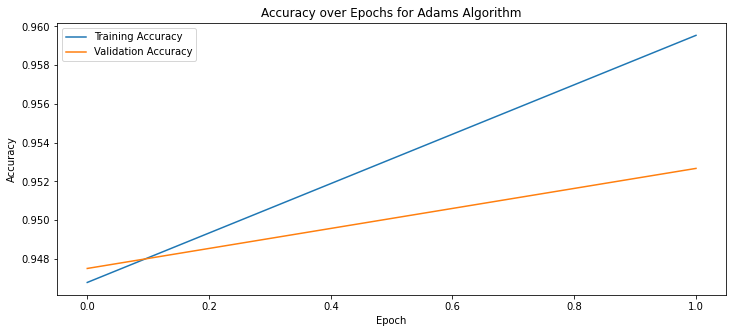

In [62]:
##################################################
#Train the network using Adam optimizer
##################################################

#Complete the below function to update the parameters using the above computed gradients
def applyGradients_Adam(weights, gradients, learning_rate, beta1=0.9, beta2=0.999):
  #Inputs: weights, gradients, and learning rate
  W1, W2, W3 = weights
  dj_dw1, dj_dw2, dj_dw3 = gradients
  epsilon=1e-8

  m1 = np.zeros_like(W1)
  m2 = np.zeros_like(W2)
  m3 = np.zeros_like(W3)
  v1 = np.zeros_like(W1)
  v2 = np.zeros_like(W2)
  v3 = np.zeros_like(W3)

  # Update biased first moment estimate
  m1 = beta1 * m1 + (1 - beta1) * dj_dw1
  m2 = beta1 * m2 + (1 - beta1) * dj_dw2
  m3 = beta1 * m3 + (1 - beta1) * dj_dw3

  # Update biased second moment estimate
  v1 = beta2 * v1 + (1 - beta2) * (dj_dw1 ** 2)
  v2 = beta2 * v2 + (1 - beta2) * (dj_dw2 ** 2)
  v3 = beta2 * v3 + (1 - beta2) * (dj_dw3 ** 2)

  # Correct bias in first moment estimate
  m1_hat = m1 / (1 - beta1)
  m2_hat = m2 / (1 - beta1)
  m3_hat = m3 / (1 - beta1)

  # Correct bias in second moment estimate
  v1_hat = v1 / (1 - beta2)
  v2_hat = v2 / (1 - beta2)
  v3_hat = v3 / (1 - beta2)

  # Update weights
  W1 -= learning_rate * m1_hat / (np.sqrt(v1_hat) + epsilon)
  W2 -= learning_rate * m2_hat / (np.sqrt(v2_hat) + epsilon)
  W3 -= learning_rate * m3_hat / (np.sqrt(v3_hat) + epsilon)

  # W1 -= learning_rate * dj_dw1
  # W2 -= learning_rate * dj_dw2
  # W3 -= learning_rate * dj_dw3

  #Return the updated parameters
  return [W1, W2, W3]

def backPropagate_activation_Adam(inputs, targets, weights, activations, learning_rate, gradactivation_function, beta1, beta2):
  #Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm
  
  #Compute the gradients
  gradients = computeGradients_activation(inputs, targets, weights, activations, gradactivation_function)

  #Update the paramters using gradients
  weights = applyGradients_Adam(weights, gradients, learning_rate, beta1, beta2)

  #Return the updated parameters
  return weights

#Complete the below function to complete the training of network
def training_activation_Adam(inputs, targets_idx, batch_size = 128, epochs=30, train_val_split=0.9, learning_rate=0.001, activation_function = ReLu, gradactivation_function = gradReLu):

  #Set the hyperparameters
  hidden_units = 3
  n_classes = 10
  n_samples = len(inputs)
  n_batches = n_samples//batch_size

  #Split the training data into two parts.
  #Use 90 percent of training data for training the network.
  #Remaining 10 percent as validation data
  split = int(n_samples * train_val_split)
  x_train = inputs[:split]
  y_train = targets_idx[:split]

  x_valid = inputs[split:]
  y_valid = targets_idx[split:]
  
  n_train = len(x_train)

  #Randomly initialize the weights
  W1 = np.random.randn(512, 784)
  W2 = np.random.randn(512, 512)
  W3 = np.random.randn(10, 512)
  weights = [W1,W2,W3]
  beta1 = 0.9
  beta2 = 0.999
  activation_function = ReLu
  gradactivation_function = gradReLu

  accuracies_valid, accuracies_train = [], []

  #Interate for epochs times
  for epoch in range(epochs):
      #Shuffle the training data
      permutation_index = np.random.permutation(n_train)
      x_train = x_train[permutation_index]
      y_train = y_train[permutation_index]
      batches = range(0, n_train - batch_size+1, batch_size)

      #Interate through the batches of data
      for batch in batches:
          #Get the batch of data
          data_b = x_train[batch : batch + batch_size]
          target_b = y_train[batch : batch + batch_size]

          #Forward propagation
          activations = fwdPropagate_activation(data_b, weights, activation_function)

          #Backward propagation
          weights = backPropagate_activation_Adam(data_b, target_b, weights, activations, learning_rate, gradactivation_function, beta1, beta2)

      beta1 *= beta1
      beta2 *= beta2
      y_prob_train = fwdPropagate_activation(x_train, weights, activation_function)[2]
      y_predLabel_train = np.argmax(y_prob_train, axis=0)
      acc_train, err_train = Accuracy(y_predLabel_train, y_train)
      y_prob_valid = fwdPropagate_activation(x_valid, weights, activation_function)[2]
      y_predLabel_valid = np.argmax(y_prob_valid, axis=0)
      acc_valid, err_valid = Accuracy(y_predLabel_valid, y_valid)
      accuracies_train += [acc_train]
      accuracies_valid += [acc_valid]

  plt.figure(figsize=(12, 5))
  plt.plot(accuracies_train, label='Training Accuracy')
  plt.plot(accuracies_valid, label='Validation Accuracy')
  plt.title(f'Accuracy over Epochs for Adams Algorithm')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  #Compute outpus on trianing data
  y_prob_train = fwdPropagate_activation(x_train, weights, activation_function)[2]
  y_predLabel_train = np.argmax(y_prob_train, axis=0)

  #Compute training accuracy, and training error
  acc_train, err_train = Accuracy(y_predLabel_train, y_train)

  #Compute outputs on validation data
  y_prob_valid = fwdPropagate_activation(x_valid, weights, activation_function)[2]
  y_predLabel_valid = np.argmax(y_prob_valid, axis=0)

  #Compute validation accuracy, and validation error
  acc_valid, err_valid = Accuracy(y_predLabel_valid, y_valid)

  #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
  print(f"The accuracy on the training data = {acc_train*100}% and the error on the training data is = {err_train*100}%")
  print(f"The accuracy on the validation data = {acc_valid*100}% and the error on the validation data is = {err_valid*100}%")

  #Save the parameters of network
  parameters = weights

  return parameters


##################################################
#Compare the accuracies and report your observations
##################################################

print('When Using Adams Algorithm:')
weights_Adam = training_activation_Adam(X_train, Y_train, epochs=2, learning_rate=0.01, activation_function= ReLu, gradactivation_function=gradReLu)
y_prob_test = fwdPropagate(X_test, weights_Adam)[2]
y_predLabel_test = np.argmax(y_prob_test, axis=0)
acc_test, err_test = Accuracy(y_predLabel_test, Y_test)
print(f"Test Accuracy: {acc_test*100}%\n")


print('When Using SGD Algorithm:')
weights = training_activation(X_train, Y_train, epochs=2, learning_rate=0.01, activation_function= ReLu, gradactivation_function=gradReLu)
y_prob_test = fwdPropagate(X_test, weights)[2]
y_predLabel_test = np.argmax(y_prob_test, axis=0)
acc_test, err_test = Accuracy(y_predLabel_test, Y_test)
print(f"Test Accuracy: {acc_test*100}%")



<b> Report your observations </b>

1. The Adams Algorithm gives better Accuracy compared to SGD Algorithm.

2. One more observation that can be noted here is that the number of epochs is low (epochs = 2) yet the Adams Algorithms reachs closer to the minima compared to the SGD Algorthms. This is due the presence of the momentum term in the adams algorithms which allows it to go quickly towards the minima compared to regular gradient descent.  

3. Adam demonstrates lower sensitivity to hyperparameter choice when compared to traditional stochastic gradient descent (SGD). Additionally, Adam typically converges in fewer epochs than SGD, resulting in the ability to achieve satisfactory results with reduced computational resources and training time.

4. Adam Algorithm also dynamically changes its learning rate so that the momentum does not overshoot the global minima.
5. The presence of the momentum (velocity) term also ensures that the adam function does not converge at local minima for a non-convex error/loss function.

<b> Part - (4) : Understanding regularization methods: </b> In this part of the assignment, you will learn about a few regularization techniques to reduce the overfitting problem. Using the above built network, include the following techniques to reduce the overfitting by retraining the network efficiently. Write down the accuracies for each case.
<dt> <h6> 1. Weight regularization: Add regularization term to the classification los </dt> </h6>
<dt> <h6> 2. Dropout with a probability of 0.2: Randomly drop the activation potentials of hidden neural with 0.2 probability. Disable the dropout layer in inference model. You can experiment with different dropout probabilities and report your observations.  </dt> </h6>
<dt> <h6> 3. Early stopping: Stop the network training when it is started to overfitting to training data. </dt> </h6>


In [21]:
##################################################
#Training with weight regularization
##################################################

def computeGradients_activation_reg(inputs, targets, weights, activations, gradactivation_fuction, lamda):
  #Inputs: input data, targets, parameters of netwrok, intermediate activations
  N = len(inputs)
  z1,z2,y,a1,a2,a3 = activations
  W1, W2, W3 = weights

  # Making Hot Encoded Matrix
  T_matrix = np.zeros((N,10))
  for i in range(N):
    T_matrix[i,targets[i]] = 1

  T_matrix = T_matrix.T

  #Compute the loss
  # Loss = 
  delta3 = y - T_matrix
  delta2 = (W3.T @ delta3) * gradactivation_fuction(a2)
  delta1 = (W2.T @ delta2) * gradactivation_fuction(a1)

  #Compote the derivative of loss at parameters
  dj_dw3 = np.zeros((10,512))
  dj_dw2 = np.zeros((512,512))
  dj_dw1 = np.zeros((512,784))

  for i in range(N):
    dj_dw3 += delta3[:,i].reshape((-1,1)) @ z2[:,i].reshape((1,-1))
    dj_dw2 += delta2[:,i].reshape((-1,1)) @ z1[:,i].reshape((1,-1))
    dj_dw1 += delta1[:,i].reshape((-1,1)) @ inputs[i,:].reshape((1,-1))

  # Adding the regularization
  dj_dw3 += lamda*W3
  dj_dw2 += lamda*W2
  dj_dw1 += lamda*W1
  
  # taking average
  dj_dw3 /= N
  dj_dw2 /= N
  dj_dw1 /= N

  #Return the gradients
  return [dj_dw1, dj_dw2, dj_dw3]


#Complete the below function to complete the backpropagation ste
def backPropagate_activation_reg(inputs, targets, weights, activations, learning_rate, gradactivation_function, lamda):
  #Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm
  
  #Compute the gradients
  gradients = computeGradients_activation_reg(inputs, targets, weights, activations, gradactivation_function, lamda)

  #Update the paramters using gradients
  weights = applyGradients(weights, gradients, learning_rate)

  #Return the updated parameters
  return weights


#Complete the below function to complete the training of network
def training_activation_reg(inputs, targets_idx, batch_size = 128, epochs=30, train_val_split=0.9, learning_rate=0.001, activation_function = ReLu, gradactivation_function = gradReLu, lamda = 0.01):

  #Set the hyperparameters
  hidden_units = 3
  n_classes = 10
  n_samples = len(inputs)
  n_batches = n_samples//batch_size

  #Split the training data into two parts.
  #Use 90 percent of training data for training the network.
  #Remaining 10 percent as validation data
  split = int(n_samples * train_val_split)
  x_train = inputs[:split]
  y_train = targets_idx[:split]

  x_valid = inputs[split:]
  y_valid = targets_idx[split:]
  
  n_train = len(x_train)

  #Randomly initialize the weights
  W1 = np.random.randn(512, 784)
  W2 = np.random.randn(512, 512)
  W3 = np.random.randn(10, 512)
  weights = [W1,W2,W3]

  #Interate for epochs times
  for epoch in range(epochs):
    #Shuffle the training data
    permutation_index = np.random.permutation(n_train)
    x_train = x_train[permutation_index]
    y_train = y_train[permutation_index]
    batches = range(0, n_train - batch_size+1, batch_size)

    #Interate through the batches of data
    for batch in batches:
      #Get the batch of data
      data_b = x_train[batch : batch + batch_size]
      target_b = y_train[batch : batch + batch_size]

      #Forward propagation
      activations = fwdPropagate_activation(data_b, weights, activation_function)

      #Backward propagation
      weights = backPropagate_activation_reg(data_b, target_b, weights, activations, learning_rate, gradactivation_function, lamda)


  #Compute outpus on trianing data
  y_prob_train = fwdPropagate_activation(x_train, weights, activation_function)[2]
  y_predLabel_train = np.argmax(y_prob_train, axis=0)

  #Compute training accuracy, and training error
  acc_train, err_train = Accuracy(y_predLabel_train, y_train)

  #Compute outputs on validation data
  y_prob_valid = fwdPropagate_activation(x_valid, weights, activation_function)[2]
  y_predLabel_valid = np.argmax(y_prob_valid, axis=0)

  #Compute validation accuracy, and validation error
  acc_valid, err_valid = Accuracy(y_predLabel_valid, y_valid)

  #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
  print(f"The accuracy on the training data = {acc_train*100}% and the error on the training data is = {err_train*100}%")
  print(f"The accuracy on the validation data = {acc_valid*100}% and the error on the validation data is = {err_valid*100}%")

  #Save the parameters of network
  parameters = weights

  return parameters


print(f'Applying L2 weight regularization:')
weights = training_activation_reg(X_train, Y_train, epochs=4, learning_rate=0.01, lamda=0.1)
y_prob_test = fwdPropagate_activation(X_test, weights, activation_function = ReLu)[2]
y_predLabel_test = np.argmax(y_prob_test, axis=0)
accuracy, error = Accuracy(y_predLabel_test, Y_test)
print(f'Test Accuracy with L2 weight regularization: {accuracy*100}% \n')

##################################################
#Training with dropout strategy
##################################################

#Complete the below function to impliment forward propagation of data
def fwdPropagate_activation_dropout(inputs, weights, activation_function, dropout_prob):
  #Inputs: input data, paramters of network
  W1, W2, W3 = weights
  inputs = inputs.T

  a1 = W1 @ inputs
  z1 = activation_function(a1)   # final (512 x 60000)
  mask1 = (np.random.uniform(0, 1, size=z1.shape) < dropout_prob)
  z1 *= mask1
  
  a2 = W2 @ z1
  z2 = activation_function(a2)   # final (512 x 60000)
  mask2 = (np.random.uniform(0, 1, size=z2.shape) < dropout_prob)
  z2 *= mask2

  a3 = W3 @ z2   
  y = softmax(a3)    # final (10 x 60000)


  outps = (z1, z2, y, a1, a2, a3)
  #Return the requires outputs, i.e., final output and intermediate activations
  return outps

#Complete the below function to complete the training of network
def training_activation_dropout(inputs, targets_idx, batch_size = 128, epochs=30, train_val_split=0.9, learning_rate=0.001, activation_function = ReLu, gradactivation_function = gradReLu, dropout_prob = 0.2):

  #Set the hyperparameters
  hidden_units = 3
  n_classes = 10
  n_samples = len(inputs)
  n_batches = n_samples//batch_size

  #Split the training data into two parts.
  #Use 90 percent of training data for training the network.
  #Remaining 10 percent as validation data
  split = int(n_samples * train_val_split)
  x_train = inputs[:split]
  y_train = targets_idx[:split]

  x_valid = inputs[split:]
  y_valid = targets_idx[split:]
  
  n_train = len(x_train)

  #Randomly initialize the weights
  W1 = np.random.randn(512, 784)
  W2 = np.random.randn(512, 512)
  W3 = np.random.randn(10, 512)
  weights = [W1,W2,W3]

  #Interate for epochs times
  for epoch in range(epochs):
    #Shuffle the training data
    permutation_index = np.random.permutation(n_train)
    x_train = x_train[permutation_index]
    y_train = y_train[permutation_index]
    batches = range(0, n_train - batch_size+1, batch_size)

    #Interate through the batches of data
    for batch in batches:
      #Get the batch of data
      data_b = x_train[batch : batch + batch_size]
      target_b = y_train[batch : batch + batch_size]

      #Forward propagation
      activations = fwdPropagate_activation_dropout(data_b, weights, activation_function, dropout_prob)

      #Backward propagation
      weights = backPropagate_activation(data_b, target_b, weights, activations, learning_rate, gradactivation_function)


  #Compute outpus on trianing data
  y_prob_train = fwdPropagate_activation(x_train, weights, activation_function)[2]
  y_predLabel_train = np.argmax(y_prob_train, axis=0)

  #Compute training accuracy, and training error
  acc_train, err_train = Accuracy(y_predLabel_train, y_train)

  #Compute outputs on validation data
  y_prob_valid = fwdPropagate_activation(x_valid, weights, activation_function)[2]
  y_predLabel_valid = np.argmax(y_prob_valid, axis=0)

  #Compute validation accuracy, and validation error
  acc_valid, err_valid = Accuracy(y_predLabel_valid, y_valid)

  #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
  print(f"The accuracy on the training data = {acc_train*100}% and the error on the training data is = {err_train*100}%")
  print(f"The accuracy on the validation data = {acc_valid*100}% and the error on the validation data is = {err_valid*100}%")

  #Save the parameters of network
  parameters = weights

  return parameters

print(f'Applying Dropout:')
weights = training_activation_dropout(X_train, Y_train, epochs=5, learning_rate=0.01, dropout_prob = 0.2)
y_prob_test = fwdPropagate_activation(X_test, weights, activation_function = ReLu)[2]
y_predLabel_test = np.argmax(y_prob_test, axis=0)
accuracy, error = Accuracy(y_predLabel_test, Y_test)
print(f'Test Accuracy with Dropout: {accuracy*100}% \n')

##################################################
#Training with early stopping criterion
##################################################

def training_activation_earlystopping(inputs, targets_idx, batch_size = 128, epochs=30, train_val_split=0.9, learning_rate=0.001, activation_function = ReLu, gradactivation_function = gradReLu, patience = 2):

  #Set the hyperparameters
  hidden_units = 3
  n_classes = 10
  n_samples = len(inputs)
  n_batches = n_samples//batch_size

  #Split the training data into two parts.
  #Use 90 percent of training data for training the network.
  #Remaining 10 percent as validation data
  split = int(n_samples * train_val_split)
  x_train = inputs[:split]
  y_train = targets_idx[:split]

  x_valid = inputs[split:]
  y_valid = targets_idx[split:]
  
  n_train = len(x_train)

  #Randomly initialize the weights
  W1 = np.random.randn(512, 784)
  W2 = np.random.randn(512, 512)
  W3 = np.random.randn(10, 512)
  weights = [W1,W2,W3]

  best_valid_accuracy = 0
  counter = 0

  #Interate for epochs times
  for epoch in range(epochs):
    #Shuffle the training data
    permutation_index = np.random.permutation(n_train)
    x_train = x_train[permutation_index]
    y_train = y_train[permutation_index]
    batches = range(0, n_train - batch_size+1, batch_size)

    #Interate through the batches of data
    for batch in batches:
      #Get the batch of data
      data_b = x_train[batch : batch + batch_size]
      target_b = y_train[batch : batch + batch_size]

      #Forward propagation
      activations = fwdPropagate_activation(data_b, weights, activation_function)

      #Backward propagation
      weights = backPropagate_activation(data_b, target_b, weights, activations, learning_rate, gradactivation_function)

    # Applying Early Stopping
    y_prob_valid = fwdPropagate_activation(x_valid, weights, activation_function)[2]
    y_predLabel_valid = np.argmax(y_prob_valid, axis=0)
    acc_valid, err_valid = Accuracy(y_predLabel_valid, y_valid)

    if acc_valid > best_valid_accuracy:
      best_valid_accuracy = acc_valid
      counter = 0
    else:
      counter += 1
    if(counter == patience):
      print(f'Early Stopped at epoch: {epoch}')
      break

  #Compute outpus on trianing data
  y_prob_train = fwdPropagate_activation(x_train, weights, activation_function)[2]
  y_predLabel_train = np.argmax(y_prob_train, axis=0)

  #Compute training accuracy, and training error
  acc_train, err_train = Accuracy(y_predLabel_train, y_train)

  #Compute outputs on validation data
  y_prob_valid = fwdPropagate_activation(x_valid, weights, activation_function)[2]
  y_predLabel_valid = np.argmax(y_prob_valid, axis=0)

  #Compute validation accuracy, and validation error
  acc_valid, err_valid = Accuracy(y_predLabel_valid, y_valid)

  #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
  print(f"The accuracy on the training data = {acc_train*100}% and the error on the training data is = {err_train*100}%")
  print(f"The accuracy on the validation data = {acc_valid*100}% and the error on the validation data is = {err_valid*100}%")

  #Save the parameters of network
  parameters = weights

  return parameters

print(f'Applying Early Stopping:')
weights = training_activation_earlystopping(X_train, Y_train, epochs=10, learning_rate=0.01, patience=2)
y_prob_test = fwdPropagate_activation(X_test, weights, activation_function = ReLu)[2]
y_predLabel_test = np.argmax(y_prob_test, axis=0)
accuracy, error = Accuracy(y_predLabel_test, Y_test)
print(f'Test Accuracy with Early Stopping: {accuracy*100}% \n')


Applying L2 weight regularization:
The accuracy on the training data = 97.12962962962963% and the error on the training data is = 2.8703703703703676%
The accuracy on the validation data = 93.91666666666667% and the error on the validation data is = 6.0833333333333295%
Test Accuracy with L2 weight regularization: 93.47999999999999% 

Applying Dropout:
The accuracy on the training data = 88.75% and the error on the training data is = 11.250000000000004%
The accuracy on the validation data = 91.13333333333333% and the error on the validation data is = 8.866666666666667%
Test Accuracy with Dropout: 88.79% 

Applying Early Stopping:
Early Stopped at epoch: 8
The accuracy on the training data = 99.06111111111112% and the error on the training data is = 0.9388888888888891%
The accuracy on the validation data = 94.26666666666667% and the error on the validation data is = 5.733333333333334%
Test Accuracy with Early Stopping: 93.49% 



<b> Report your observations </b>

Regularization techniques, such as weight regularization, dropout, and early stopping, play a crucial role in enhancing the performance of machine learning models.

1. **Weight Regularization:** Weight regularization methods like L1 and L2 regularization introduce penalty terms to the loss function based on the weights' magnitudes. This penalty discourages the model from becoming overly complex by penalizing large weight values.

2. **Dropout:** Dropout is a regularization approach where random neurons are temporarily excluded or "dropped out" during training, resulting in their outputs being set to zero. By randomly dropping neurons, dropout prevents them from co-adapting, promoting the learning of more robust and diverse features.

3. **Early Stopping:** Early stopping involves monitoring the model's performance on a validation set during training and halting the training process when performance begins to deteriorate. This prevents overfitting by terminating training before the model's performance on the validation set starts to decline.



<b> Part - (5) : Comparision with linear classifiers: </b> In this part of the assignment, you will compare the performance of deep neural network based classification models with the linear classification models. You will be provided with codes to generate two types of binary classification data. First type of data is linearly separabble. The second type of data is not linearly separable. You have to classify these two types of data bases using both deep neural network models and linear classification models.

<dt> <h6> 1. Linearly separable data: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 3  \\ 3  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 4500 samples per class for training and 500 samples for testing.
</dt> </h6>
<dt> <h6> 2. Non-linearly separable data: Given code generates binary classification data that is not linearly separable. Each class has around 5000 data points. Class1 data is denoted with the variable "class1_data". Class2 data is denoted with the variable "class2_data". Use 90% of data for training and 10 % for testing.    </dt> </h6>

<dt> <h6> <b> Programming questions: </b> </dt> </h6>

<dt> <h6> 3. Linear classification models - logistic regression ( Iterative reweighted least squares approach ): logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. Given the training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data X_test. </dt> </h6>
<dd> <h6> a). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.
</dd> </h6>
<dd> <h6> b). Evaluate the classification performance, i.e., compute the accuracy on the test data. </dd> </h6>
<dd> <h6> c). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different. </dd> </h6>

<dt> <h6> 4. Deep neural network based classification models: Let us cosider feed-forward neural network with three layers. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dt> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dt> </h6>

<dd> <h6> - where $\textbf{W}_{1} \in \mathcal{R}^{3 \times 2}$,$\textbf{W}_{2} \in \mathcal{R}^{3 \times 3}$,$\textbf{W}_{3} \in \mathcal{R}^{1 \times 3} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dt> </h6>

<dd> <h6> - Consider g(.) as ReLU activation function. Sigmoid activation function should be used at the last layer h(.), to get the posterior probability of the class1. Class2 posterior probability can obtained by (1 - class1 posterior probability). </dt> </h6>
<dd> <h6> - Train the binary classification network using the given training data. Plot second layer activation potentials, i.e., feed-forward the entire data to obtain the 3 dimensional activation potentials at second layer. Plot them and observe how they distribute in the 3-dimensional space compared to the original 2-dimensional space. </dt> </h6>
<dd> <h6> - Evaluate the classification performance on test data. Report your observations </dt> </h6>

<dt> <h6> 3. Compare linear classification models with the deep neural network based classification models. Report your observations. </dt> </h6>



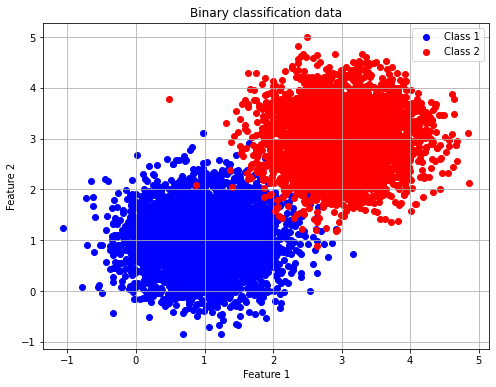

In [26]:
##################################################
#Generating binary classification data (linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

mean1 = [1,1]
mean2 = [3,3]
cov = [[0.3,0],[0,0.3]]
class1_tr = np.random.multivariate_normal(mean1, cov, size=(4500))
class2_tr = np.random.multivariate_normal(mean2, cov, size=(4500))

tr_data = np.concatenate([class1_tr, class2_tr], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_tr)), np.ones(len(class2_tr))])

class1_te = np.random.multivariate_normal(mean1, cov, size=(500))
class2_te = np.random.multivariate_normal(mean2, cov, size=(500))

te_data = np.concatenate([class1_te, class2_te], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_te)), np.ones(len(class2_te))])

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_tr[:, 0], class1_tr[:, 1], color='blue', label='Class 1')
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()

def normalize_data(data):
    # Normalize the data to have zero mean and unit variance
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    normalized_data = (data - mean) / std
    return normalized_data, mean, std

# Normalize the training data
tr_data, mean, std = normalize_data(tr_data)

# Normalize the test data using the mean and std from training data
te_data = (te_data - mean) / std

In [27]:
##################################################
#Classify the linearly separable data using linear classification models
##################################################
def Accuracy(Y_test, Y_pred):
    #Inputs: Ground truth test labels and predicted test labels
    #Outputs: Accuracy, error
    
    #Compute the accuracy
    accuracy = np.count_nonzero((Y_test - Y_pred)==0)/Y_pred.shape[0]
    error = 1 - accuracy
    #Return the accuracy
    return (accuracy,error)

def sigmoid(inp):
    positive = (inp>=0)
    negative = ~positive
    outp = inp.copy()
    outp[positive] = 1 / (1 + np.exp(-inp[positive]))
    outp[negative] = np.exp(inp[negative]) / (1 + np.exp(inp[negative]))
    return outp

def Logistic_Regression(X_train, Y_train, X_test):
  #Inputs: Training data, Training labels, and Testing data
  #Outputs: Predictions on test data
  N_tr = X_train.shape[0]

  max_iter = 10 #max number of iterations for parameter update
  threshold = 0.5 #threshold for classification
  X = np.hstack((np.ones((N_tr,1)),X_train))         #Data. Append ones to the training data to take care of the bias
  w = np.random.rand(X.shape[1]).reshape((3,1))       #Initialize the weight vector
  for iter in range(0,max_iter,1):
    z =  (X @ w).ravel()  #Predictions on X. Sigmoid(w^T.x)
    preds =  sigmoid(z)
    preds = preds.ravel()
    error =  (preds - Y_train).reshape((N_tr,1))  #Difference between preds and Y_train
    #Compute the gradients and the appropriate learning rate. We can use Hessian matrix as learning rate
    gradient = X.T @ error
    R = np.diag((preds * (1 - preds)).tolist())
    hessian = X.T @ R @ X

    #Update the weight vector
    w = w - np.linalg.pinv(hessian) @ gradient

  #Test data predictions
  #Compare the predictions with 0, to output the decision
  N_te = X_test.shape[0]
  X_te = np.hstack((np.ones((N_te,1)),X_test))         #Data. Append ones to the training data to take care of the bias
  test_preds = ((sigmoid(X_te.dot(w)) > threshold).astype(int)).ravel()

  #Return the predicted test labels
  return test_preds

Y_pred_logistic = Logistic_Regression(tr_data, tr_targets, te_data)

##################################################
#Classify the linearly separable data using deep neural based classification models
##################################################

def sigmoid(inp):
    positive = (inp>=0)
    negative = ~positive
    outp = inp.copy()
    outp[positive] = 1 / (1 + np.exp(-inp[positive]))
    outp[negative] = np.exp(inp[negative]) / (1 + np.exp(inp[negative]))
    return outp

def ReLu(inp):      
  outp = np.maximum(inp,0)
  return outp

#Complete the below function to impliment gradient of ReLU activation function
def gradReLu(inp):     
  outp = np.zeros(inp.shape)
  outp[inp>=0] = 1
  return outp

def sigmoid(inp):
    positive = (inp>=0)
    negative = ~positive
    outp = inp.copy()
    outp[positive] = 1 / (1 + np.exp(-inp[positive]))
    outp[negative] = np.exp(inp[negative]) / (1 + np.exp(inp[negative]))
    return outp

def gradsigmoid(inp):
    return sigmoid(inp) * (1 - sigmoid(inp))

def softmax(inp):
    max_val = np.max(inp, axis=0, keepdims=True)
    shifted_input = inp - max_val
    exponentiated = np.exp(shifted_input)
    sum_exp = np.sum(exponentiated, axis=0, keepdims=True)
    softmax_output = exponentiated / sum_exp
    return softmax_output

#Complete the below function to impliment forward propagation of data
def fwdPropagate(inputs, weights):
  #Inputs: input data, paramters of network
  W1, W2, W3, b1, b2, b3 = weights
  inputs = inputs.T

  a1 = W1 @ inputs + b1
  z1 = ReLu(a1)   # final (512 x 60000)
  
  a2 = W2 @ z1 + b2
  z2 = ReLu(a2)   # final (512 x 60000)

  a3 = W3 @ z2 + b3  
  y = softmax(a3)    # final (10 x 60000)

  # y_predLabel = np.argmax(y)

  outps = (z1, z2, y, a1, a2, a3)
  #Return the requires outputs, i.e., final output and intermediate activations
  return outps

#Complete the below function to compute the gradients
def computeGradients(inputs, targets, weights, activations):
  #Inputs: input data, targets, parameters of netwrok, intermediate activations
  N = len(inputs)
  z1,z2,y,a1,a2,a3 = activations
  W1, W2, W3, b1, b2, b3 = weights

  # Making Hot Encoded Matrix
  T_matrix = np.zeros((N,1))
  for i in range(N):
    if(targets[i] == 0):
      T_matrix[i,0] = 1
    else:
      T_matrix[i,0] = 0

  T_matrix = T_matrix.T

  #Compute the loss
  # delta3 = (T_matrix/y) * gradsigmoid(a3) 
  delta3 = y - T_matrix                                   # 1 x N
  delta2 = (W3.T @ delta3) * gradReLu(a2)                 # 3 x N
  delta1 = (W2.T @ delta2) * gradReLu(a1)                 # 3 x N     

  #Compote the derivative of loss at parameters
  dj_dw3 = np.zeros_like(W3)
  dj_dw2 = np.zeros_like(W2)
  dj_dw1 = np.zeros_like(W1)

  for i in range(N):
    dj_dw3 += delta3[:,i].reshape((-1,1)) @ z2[:,i].reshape((1,-1))
    dj_dw2 += delta2[:,i].reshape((-1,1)) @ z1[:,i].reshape((1,-1))
    dj_dw1 += delta1[:,i].reshape((-1,1)) @ inputs[i,:].reshape((1,-1))

  # taking average
  dj_dw3 /= N
  dj_dw2 /= N
  dj_dw1 /= N 

  dj_db3 = np.mean(delta3, axis=1).reshape((-1,1))
  dj_db2 = np.mean(delta2, axis=1).reshape((-1,1))
  dj_db1 = np.mean(delta1, axis=1).reshape((-1,1))

  #Return the gradients
  return [dj_dw1, dj_dw2, dj_dw3, dj_db1, dj_db2, dj_db3]

#Complete the below function to update the parameters using the above computed gradients
def applyGradients(weights, gradients, learning_rate):
  #Inputs: weights, gradients, and learning rate
  W1, W2, W3, b1, b2, b3 = weights
  dj_dw1, dj_dw2, dj_dw3, dj_db1, dj_db2, dj_db3 = gradients

  W1 -= learning_rate * dj_dw1
  W2 -= learning_rate * dj_dw2
  W3 -= learning_rate * dj_dw3

  b1 -= learning_rate * dj_db1
  b2 -= learning_rate * dj_db2
  b3 -= learning_rate * dj_db3
  
  #Return the updated parameters
  return [W1, W2, W3, b1, b2, b3]

#Complete the below function to complete the backpropagation ste
def backPropagate(inputs, targets, weights, activations, learning_rate):
  #Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm
  gradients = computeGradients(inputs, targets, weights, activations)
  weights = applyGradients(weights, gradients, learning_rate)
  return weights

def training(inputs, targets_idx, batch_size = 128, epochs=30, train_val_split=0.9, learning_rate=0.001):
  hidden_units = 3
  n_classes = 1
  n_samples = len(inputs)
  n_batches = n_samples//batch_size

  #Split the training data into two parts.
  #Use 90 percent of training data for training the network.
  #Remaining 10 percent as validation data
  permutation_index = np.random.permutation(n_samples)
  inputs = inputs[permutation_index]
  targets_idx = targets_idx[permutation_index]
  split = int(n_samples * train_val_split)
  x_train = inputs[:split]
  y_train = targets_idx[:split]

  x_valid = inputs[split:]
  y_valid = targets_idx[split:]
  
  n_train = len(x_train)

  #Randomly initialize the weights
  # W1 = np.random.uniform(-0.03,0.03, size=(3,2))
  # W2 = np.random.uniform(-0.03,0.03, size=(3,3))
  # W3 = np.random.uniform(-0.03,0.03, size=(1,3))
  # b1 = np.random.uniform(-0.03,0.03, size=(3,1))
  # b2 = np.random.uniform(-0.03,0.03, size=(3,1))
  # b3 = np.random.uniform(-0.03,0.03, size=(1,1))
  
  W1 = np.random.randn(3,2)
  W2 = np.random.randn(3,3)
  W3 = np.random.randn(1,3)
  b1 = np.random.randn(3,1)
  b2 = np.random.randn(3,1)
  b3 = np.random.randn(1,1)

  weights = [W1, W2, W3, b1, b2, b3]

  #Interate for epochs times
  for epoch in range(epochs):
    #Shuffle the training data
    permutation_index = np.random.permutation(n_train)
    x_train = x_train[permutation_index]
    y_train = y_train[permutation_index]
    batches = range(0, n_train - batch_size+1, batch_size)

    #Interate through the batches of data
    for batch in batches:
      #Get the batch of data
      data_b = x_train[batch : batch + batch_size]
      target_b = y_train[batch : batch + batch_size]

      #Forward propagationT_matrix/y
      activations = fwdPropagate(data_b, weights)

      #Backward propagation
      weights = backPropagate(data_b, target_b, weights, activations, learning_rate)


  #Compute outpus on trianing data
  y_prob_train = fwdPropagate(x_train, weights)[2]
  y_predLabel_train = [0 if prob >= 0.5 else 1 for prob in y_prob_train.ravel()]

  #Compute training accuracy, and training error
  acc_train, err_train = Accuracy(y_predLabel_train, y_train)

  #Compute outputs on validation data
  y_prob_valid = fwdPropagate(x_valid, weights)[2]
  y_predLabel_valid = [0 if prob >= 0.5 else 1 for prob in y_prob_valid.ravel()]

  #Compute validation accuracy, and validation error
  acc_valid, err_valid = Accuracy(y_predLabel_valid, y_valid)

  #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
  print(f"The accuracy on the training data = {acc_train*100}% and the error on the training data is = {err_train*100}%")
  print(f"The accuracy on the validation data = {acc_valid*100}% and the error on the validation data is = {err_valid*100}%")

  #Save the parameters of network
  parameters = weights

  return parameters

# Call the training function to train the network
print('In the neural network:')
weights = training(tr_data, tr_targets, epochs=3, learning_rate=0.001)
y_prob_test = fwdPropagate(te_data, weights)[2]
# print(y_prob_test)
y_predLabel_NN = np.array([0 if prob >= 0.5 else 1 for prob in y_prob_test.ravel()])

##################################################
#Compare the performance of both the models on linearly separable data
##################################################

acc_test_logisticRegression, err_test_logisticRegression = Accuracy(Y_pred_logistic, te_targets)
print(f"\n\nTest Accuracy for Logistic Regression: {acc_test_logisticRegression*100}% \n")

acc_test_NN, err_test_NN = Accuracy(y_predLabel_NN, te_targets)
print(f"Test Accuracy for Neural Networks: {acc_test_NN*100}% \n")



In the neural network:
The accuracy on the training data = 50.08641975308642% and the error on the training data is = 49.91358024691358%
The accuracy on the validation data = 49.22222222222222% and the error on the validation data is = 50.77777777777778%


Test Accuracy for Logistic Regression: 99.4% 

Test Accuracy for Neural Networks: 50.0% 



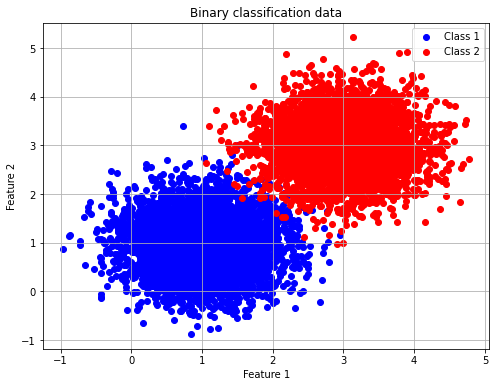

Epoch 1, Loss: -5.0037036482753205e-09
Epoch 2, Loss: -5.003703648275321e-09
Epoch 3, Loss: -5.0037036482753205e-09
Epoch 4, Loss: -5.003703648275321e-09
Epoch 5, Loss: -5.003703648275321e-09
Epoch 6, Loss: -5.0037036482753205e-09
Epoch 7, Loss: -5.003703648275322e-09
Epoch 8, Loss: -5.003703648275321e-09
Epoch 9, Loss: -5.003703648275321e-09
Epoch 10, Loss: -5.0037036482753205e-09
Epoch 11, Loss: -5.003703648275322e-09
Epoch 12, Loss: -5.003703648275321e-09
Epoch 13, Loss: -5.003703648275321e-09
Epoch 14, Loss: -5.003703648275322e-09
Epoch 15, Loss: -5.003703648275321e-09
Epoch 16, Loss: -5.003703648275321e-09
Epoch 17, Loss: -5.003703648275321e-09
Epoch 18, Loss: -5.003703648275321e-09
Epoch 19, Loss: -5.0037036482753205e-09
Epoch 20, Loss: -5.003703648275321e-09
Epoch 21, Loss: -5.003703648275322e-09
Epoch 22, Loss: -5.003703648275321e-09
Epoch 23, Loss: -5.0037036482753205e-09
Epoch 24, Loss: -5.003703648275321e-09
Epoch 25, Loss: -5.003703648275321e-09
Epoch 26, Loss: -5.003703648

In [35]:
##################################################
#Generating binary classification data (linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

mean1 = [1,1]
mean2 = [3,3]
cov = [[0.3,0],[0,0.3]]
class1_tr = np.random.multivariate_normal(mean1, cov, size=(4500))
class2_tr = np.random.multivariate_normal(mean2, cov, size=(4500))

tr_data = np.concatenate([class1_tr, class2_tr], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_tr)), np.ones(len(class2_tr))])

class1_te = np.random.multivariate_normal(mean1, cov, size=(500))
class2_te = np.random.multivariate_normal(mean2, cov, size=(500))

te_data = np.concatenate([class1_te, class2_te], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_te)), np.ones(len(class2_te))])

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_tr[:, 0], class1_tr[:, 1], color='blue', label='Class 1')
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()

def normalize_data(data):
    # Normalize the data to have zero mean and unit variance
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    normalized_data = (data - mean) / std
    return normalized_data, mean, std

# Normalize the training data
tr_data, mean, std = normalize_data(tr_data)

# Normalize the test data using the mean and std from training data
te_data = (te_data - mean) / std

def ReLU(inp):      
    outp = np.maximum(inp, 0)
    return outp

def gradReLU(inp):     
    outp = np.zeros(inp.shape)
    outp[inp >= 0] = 1
    return outp

def softmax(inp):
    max_val = np.max(inp, axis=0, keepdims=True)
    shifted_input = inp - max_val
    exponentiated = np.exp(shifted_input)
    sum_exp = np.sum(exponentiated, axis=0, keepdims=True)
    softmax_output = exponentiated / sum_exp
    return softmax_output

def fwdPropagate(inputs, weights):
    W1, W2, W3, b1, b2, b3 = weights
    inputs = inputs.T

    a1 = W1 @ inputs + b1
    z1 = ReLU(a1)

    a2 = W2 @ z1 + b2
    z2 = ReLU(a2)

    a3 = W3 @ z2 + b3  
    y = softmax(a3)

    outps = (z1, z2, y, a1, a2, a3)
    return outps

def computeGradients(inputs, targets, weights, activations):
    N = len(inputs)
    z1, z2, y, a1, a2, a3 = activations
    W1, W2, W3, b1, b2, b3 = weights

    T_matrix = targets.reshape(1, -1)

    delta3 = y - T_matrix
    delta2 = (W3.T @ delta3) * gradReLU(a2)
    delta1 = (W2.T @ delta2) * gradReLU(a1)

    dj_dw3 = delta3 @ z2.T
    dj_dw2 = delta2 @ z1.T
    dj_dw1 = delta1 @ inputs

    dj_db3 = np.mean(delta3, axis=1).reshape((-1, 1))
    dj_db2 = np.mean(delta2, axis=1).reshape((-1, 1))
    dj_db1 = np.mean(delta1, axis=1).reshape((-1, 1))

    return [dj_dw1, dj_dw2, dj_dw3, dj_db1, dj_db2, dj_db3]

# Remove the redundant sigmoid function definition

def training(inputs, targets_idx, batch_size=128, epochs=50, train_val_split=0.9, learning_rate=0.01, clip_threshold=1):
    hidden_units = 10  # Increase hidden units
    n_samples = len(inputs)
    n_batches = n_samples // batch_size

    permutation_index = np.random.permutation(n_samples)
    inputs = inputs[permutation_index]
    targets_idx = targets_idx[permutation_index]
    split = int(n_samples * train_val_split)
    x_train = inputs[:split]
    y_train = targets_idx[:split]

    n_train = len(x_train)

    def clip_gradients(gradients, threshold):
        clipped_gradients = []
        for grad in gradients:
            clipped_grad = np.clip(grad, -threshold, threshold)
            clipped_gradients.append(clipped_grad)
        return clipped_gradients

    def small_init(in_size, out_size):
        return np.random.randn(out_size, in_size) * 0.01  # Adjust the scale here

    W1 = small_init(tr_data.shape[1], hidden_units)
    W2 = small_init(hidden_units, hidden_units)
    W3 = small_init(hidden_units, 1)

    b1 = np.random.randn(hidden_units, 1)
    b2 = np.random.randn(hidden_units, 1)
    b3 = np.random.randn(1, 1)

    weights = [W1, W2, W3, b1, b2, b3]

    for epoch in range(epochs):
        permutation_index = np.random.permutation(n_train)
        x_train = x_train[permutation_index]
        y_train = y_train[permutation_index]
        batches = range(0, n_train - batch_size + 1, batch_size)

        for batch in batches:
            data_b = x_train[batch:batch + batch_size]
            target_b = y_train[batch:batch + batch_size]

            activations = fwdPropagate(data_b, weights)
            gradients = computeGradients(data_b, target_b, weights, activations)
            gradients = clip_gradients(gradients, clip_threshold)  # Clip gradients

            # Update weights using clipped gradients
            for i in range(len(weights)):
                weights[i] -= learning_rate * gradients[i]

        # Monitor loss
        loss = compute_loss(x_train, y_train, weights)
        print(f"Epoch {epoch+1}, Loss: {loss}")

    y_prob_train = fwdPropagate(x_train, weights)[2]
    y_predLabel_train = (y_prob_train > 0.5).astype(int).reshape(-1)

    acc_train = np.mean(y_predLabel_train == y_train)
    err_train = 1 - acc_train

    print(f"The accuracy on the training data = {acc_train * 100}% and the error on the training data is = {err_train * 100}%")

    parameters = weights
    return parameters

# Define compute_loss function
def compute_loss(inputs, targets, weights):
    activations = fwdPropagate(inputs, weights)
    y_pred = activations[2]
    loss = -np.mean(targets * np.log(y_pred + 1e-8))  # Add epsilon to avoid taking log(0)
    return loss

# Adjust learning rate, epochs, and hidden units
weights = training(tr_data, tr_targets, epochs=100, learning_rate=0.0001, clip_threshold=1)



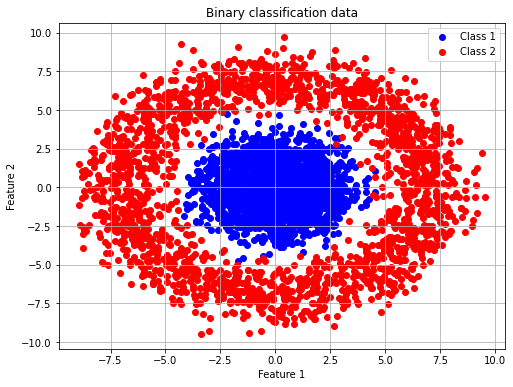

In [69]:
##################################################
#Generating binary classification data (non-linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

# Function to generate data for concentric circles
def generate_concentric_data(n_samples, radius1,radius2, noise_std):
    # Generate random angles
    angles = np.random.rand(n_samples) * 2 * np.pi
    noise = noise_std*np.random.randn(n_samples)
    # Generate inner and outer circles
    inner_circle = np.array([(radius1 + noise) * np.cos(angles), (radius1 + noise) * np.sin(angles)]).T
    outer_circle = np.array([(radius2 + noise) * np.cos(angles), (radius2 + noise) * np.sin(angles)]).T
    return inner_circle, outer_circle

# Generate data for two classes
n_samples = 2000  # Number of samples for each class
radius1 = 2  # Radius of inner circle
radius2 = 7  # Radius of inner circle
noise_std = 1   # Noise to be added to radius

class1_data, class2_data = generate_concentric_data(n_samples, radius1,radius2,noise_std)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()




In [72]:


##################################################
#Classify the non-linearly separable data using linear classification models
##################################################






##################################################
#Classify the non-linearly separable data using deep neural based classification models
##################################################







##################################################
#Compare the performance of both the models on non-linearly separable data
##################################################










**Report: Observations**

### 1. Performance on Linearly Separable Data

- **Logistic Regression**:
  - **Efficiency and Simplicity**: Logistic Regression demonstrates high efficiency on linearly separable data due to its straightforward approach, directly determining a separating hyperplane without requiring complex computations.
  - **Stability**: Logistic Regression consistently performs well without encountering initialization issues or getting stuck in local minima during training, unlike Deep Neural Networks.

### 2. Performance on Non-Linearly Separable Data

- **Deep Neural Networks**:
  - **Complex Pattern Recognition**: Deep Neural Networks excel in environments with non-linear data distributions, owing to their ability to recognize intricate patterns through multiple layers and non-linear activations, thus surpassing Logistic Regression.
  - **Model Scalability**: The adaptability of Deep Neural Networks to adjust complexity by adding layers or neurons makes them suitable for handling diverse and challenging datasets.
